In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### QQ-Plot is to visually determine how close sample is to a normal distribution

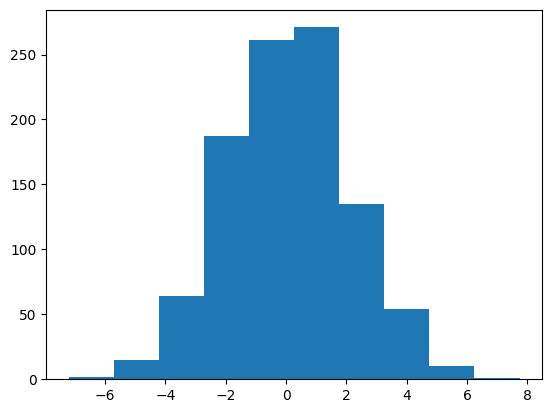

In [5]:
mean_center = 0
std = 2
num_data_points = 1000
data = np.random.normal(loc=mean_center, scale=std, size=num_data_points)
plt.hist(data)
plt.show()

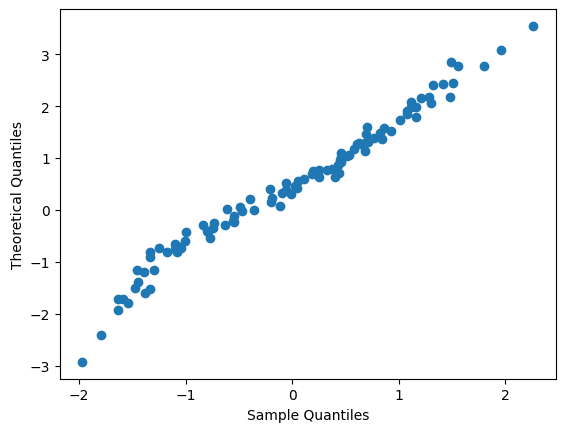

In [16]:
def calculate_percentile(data, percentile):
    if percentile < 0 or percentile > 100:
        raise Exception("Not valid percentile")
    
    data = np.sort(data)
    index = (percentile/100)*(len(data) + 1)

    upper_index = int(np.ceil(index))
    lower_index = int(np.floor(index))
    fraction = index - lower_index

    if upper_index == lower_index:
        return data[upper_index]
    

    return data[lower_index] + fraction*(upper_index-lower_index)

sample_size = num_data_points//10
sample = np.random.choice(data, size=sample_size)
sample_mean = np.mean(sample)
sample_std = np.std(sample)

# Normalize sample (Called the z-score)
sample_normalized = (sample - sample_mean)/sample_std

# Practical values
sample_quantiles = np.sort(sample_normalized)

# Theoretical values
theoretical_quantiles = np.array([calculate_percentile(np.random.normal(0, 1, sample_size), (i)/sample_size*100) for i in range(sample_size)])
plt.scatter(sample_quantiles, theoretical_quantiles)
plt.xlabel("Sample Quantiles")
plt.ylabel("Theoretical Quantiles")
plt.show()

#### The resulting QQ-plot shows the sampled normal distribution and original distribution lays on the line. Indicating that the sampled original dataset is normally distributed. Let's try with data not normally distributed.

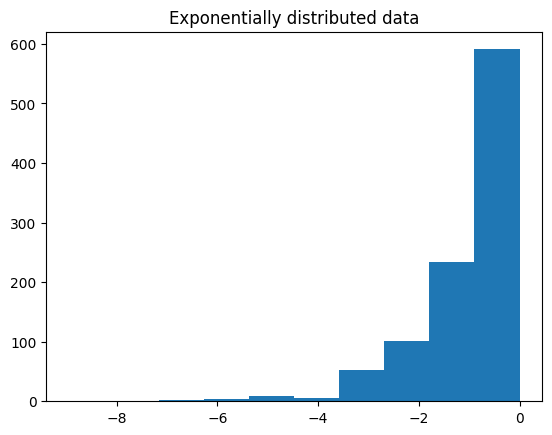

In [29]:
data = -np.random.exponential(scale=1, size=num_data_points)
plt.hist(data)
plt.title("Exponentially distributed data")
plt.show()

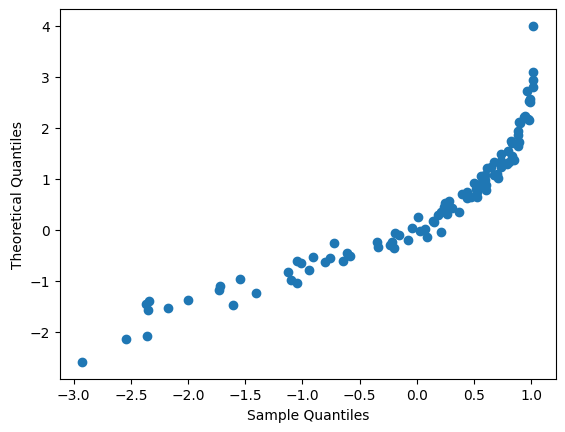

In [30]:
sample_size = num_data_points//10
sample = np.random.choice(data, size=sample_size)
sample_mean = np.mean(sample)
sample_std = np.std(sample)

# Normalize sample (Called the z-score)
sample_normalized = (sample - sample_mean)/sample_std

# Practical values
sample_quantiles = np.sort(sample_normalized)

# Theoretical values
theoretical_quantiles = np.array([calculate_percentile(np.random.normal(0, 1, sample_size), (i)/sample_size*100) for i in range(sample_size)])
plt.scatter(sample_quantiles, theoretical_quantiles)
plt.xlabel("Sample Quantiles")
plt.ylabel("Theoretical Quantiles")
plt.show()

#### The QQ-plot displays data that is not linear, indicating none normally distributed data.